# Spring 2019 Statistical NLP, UCSD
Programming Assignment 1: Language Modeling<br>


In [1]:
import numpy as np
from math import log

In [2]:
import data as datainterface
from generator import Sampler
import random
import timeit
import nltk

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dnames = ["brown", "reuters", "gutenberg"]
datas = {}
models = {}
# Learn the models for each of the domains, and evaluate it
for dname in dnames:
    print("-----------------------")
    print(dname)
    data = datainterface.read_texts("data/corpora_.tar.gz", dname)
    datas[dname] = data
    model = datainterface.learn_trigram(data, False)
    models[dname] = model

-----------------------
brown
	test: brown/brown.test.txt
	train: brown/brown.train.txt
	dev: brown/brown.dev.txt
brown  read. train: 39802 dev: 8437 test: 8533
-----------------------
reuters
	dev: reuters/reuters.dev.txt
	test: reuters/reuters.test.txt
	train: reuters/reuters.train.txt
reuters  read. train: 38169 dev: 8082 test: 8214
-----------------------
gutenberg
	dev: gutenberg/gutenberg.dev.txt
	train: gutenberg/gutenberg.train.txt
	test: gutenberg/gutenberg.test.txt
gutenberg  read. train: 68740 dev: 14729 test: 14826


In [12]:
print("\ttrain:", models['brown'].perplexity(datas['brown'].train))

	train: 184688.41279315125


In [4]:
models['brown'].model[( '*','*')]

3.0

In [13]:
models['brown'].model

{('The', '*', '*'): 4755.0,
 ('*', '*'): 39802.0,
 'The': 5123.0,
 ('September', 'The', '*'): 1.0,
 ('The', '*'): 4754.0,
 'September': 40.0,
 ('October', 'September', 'The'): 1.0,
 ('September', 'The'): 1.0,
 'October': 43.0,
 ('term', 'October', 'September'): 1.0,
 ('October', 'September'): 1.0,
 'term': 89.0,
 ('jury', 'term', 'October'): 1.0,
 ('term', 'October'): 1.0,
 'jury': 51.0,
 ('had', 'jury', 'term'): 1.0,
 ('jury', 'term'): 1.0,
 'had': 3616.0,
 ('been', 'had', 'jury'): 1.0,
 ('had', 'jury'): 1.0,
 'been': 1749.0,
 ('charged', 'been', 'had'): 1.0,
 ('been', 'had'): 538.0,
 'charged': 43.0,
 ('by', 'charged', 'been'): 1.0,
 ('charged', 'been'): 1.0,
 'by': 3607.0,
 ('Fulton', 'by', 'charged'): 1.0,
 ('by', 'charged'): 3.0,
 'Fulton': 8.0,
 ('Superior', 'Fulton', 'by'): 1.0,
 ('Fulton', 'by'): 1.0,
 'Superior': 14.0,
 ('Court', 'Superior', 'Fulton'): 2.0,
 ('Superior', 'Fulton'): 2.0,
 'Court': 85.0,
 ('Judge', 'Court', 'Superior'): 1.0,
 ('Court', 'Superior'): 11.0,
 'Judge

In [5]:
models['brown'].num_words

733485.0

In [ ]:
(self.model[(word,prev1,prev2)]+1.0)/( self.model[(prev1,prev2)]+ self.num_words)

In [53]:
models['brown'].num_words

733485.0

In [ ]:
if (word,prev1,prev2) in self.model:
    print(self.model[(word,prev1,prev2)])
    return log( (self.model[(word,prev1,prev2)]+1)/( self.model[(prev1,prev2)] + self.num_words), 2)
elif (prev1, prev2) in self.model:
    return log(1.0/( self.model[(prev1,prev2)] + self.num_words), 2)
else:
    return log(1.0/self.num_words, 2)

In [14]:
ans = 0
for w in models['brown'].model:
    #if isinstance(w,tuple) and len(w)==3:
    if w[-2]=='hard' and w[-1]=='the' and isinstance(w,tuple) and len(w)==3:
        ans+= models['brown'].model[w]
        #print(w, (w[-2],w[-1]), models['brown'].model[w],models['brown'].model[(w[-2],w[-1])] )
        #ans += (models['brown'].model[w])/(models['brown'].model[(w[-2],w[-1])])
print(ans,models['brown'].model[('hard','the')] )

16.0 16.0


In [19]:
models['brown'].logprob_sentence(['The', 'new', 'school'])

sentence:  []
num of words:  733485.0
sentence:  ['The']
num of words:  733485.0
sentence:  ['The', 'new']
num of words:  733485.0
sentence:  ['The', 'new', 'school']
num of words:  733485.0


-59.9008261150592

In [45]:
['of', 'size', 'the'][-2]

'size'

In [37]:
sum(models['brown'].word_dict.values())

693683

In [20]:
print(models['brown'].model[('The', '*', '*') ])
print(models['brown'].model[('*', '*') ])

4755.0
39802.0


In [21]:
print(models['brown'].model[('new', 'The', '*') ])
print(models['brown'].model[('The', '*') ])

29.0
4754.0


In [23]:
print(models['brown'].model[('school', 'new', 'The') ])
print(models['brown'].model[('new', 'The') ])

1.0
29.0


In [25]:
print(models['brown'].model[('superintendent', 'school', 'new') ])
print(models['brown'].model[('school', 'new') ])

2.0
2.0


In [30]:
log( (4755.0+1)/(39802.0+733485.0),2)+ log( (29.0+1)/(4754.0+733485.0),2)+\
log( (1.0+1)/(29.0+733485.0),2)+ log( (1)/(2+733485.0),2)

-59.9008261150592

In [7]:
print(models['brown'].model[('size', 'of', '*') ])
print(models['brown'].model[('of', '*') ])

KeyError: ('size', 'of', '*')

In [43]:
models['brown'].model['END_OF_SENTENCE']

39802.0

In [39]:
log(25.0/(32+733485.0),2)

-14.840614686868166

In [30]:
models['brown'].num_words

733485.0

In [ ]:

if (word,prev1,prev2) in models['brown'].model:
    return log( (models['brown'].model[(word,prev1,prev2)]+1)/( models['brown'].model[(prev1,prev2)] \
                                                               + models['brown'].num_words), 2)
elif (prev1, prev2) in models['brown'].model:
    return log(1.0/( models['brown'].model[(prev1,prev2)] + models['brown'].num_words), 2)
else:
    return log(1.0/self.num_words, 2)

In [4]:
2**models['brown'].model[('Court', 'Superior', 'Fulton')]

2.0

In [26]:
models['brown'].cond_logprob

<bound method Trigram.cond_logprob of <lm.Trigram object at 0x1a2c447048>>

In [10]:
models['brown'].model

{('The', '*', '*'): 1.0,
 ('*', '*'): 1.5849625007211563,
 'The': 1.0,
 ('September', 'The', '*'): 0.0,
 ('The', '*'): 1.0,
 'September': 0.0,
 ('October', 'September', 'The'): 0.0,
 ('September', 'The'): 0.0,
 'October': 0.0,
 ('term', 'October', 'September'): 0.0,
 ('October', 'September'): 0.0,
 'term': 0.0,
 ('jury', 'term', 'October'): 0.0,
 ('term', 'October'): 0.0,
 'jury': 1.5849625007211563,
 ('had', 'jury', 'term'): 0.0,
 ('jury', 'term'): 0.0,
 'had': 0.0,
 ('been', 'had', 'jury'): 0.0,
 ('had', 'jury'): 0.0,
 'been': 0.0,
 ('charged', 'been', 'had'): 0.0,
 ('been', 'had'): 0.0,
 'charged': 0.0,
 ('by', 'charged', 'been'): 0.0,
 ('charged', 'been'): 0.0,
 'by': 1.0,
 ('Fulton', 'by', 'charged'): 0.0,
 ('by', 'charged'): 0.0,
 'Fulton': 0.0,
 ('Superior', 'Fulton', 'by'): 0.0,
 ('Fulton', 'by'): 0.0,
 'Superior': 0.0,
 ('Court', 'Superior', 'Fulton'): 0.0,
 ('Superior', 'Fulton'): 0.0,
 'Court': 0.0,
 ('Judge', 'Court', 'Superior'): 0.0,
 ('Court', 'Superior'): 0.0,
 'Judge':

In [8]:
print("\ttrain:", models['brown'].perplexity(datas['brown'].train))

	train: 46.642537952378746


In [27]:
for dname in dnames:
    print('Corpus: %s' %(dname))
    print("\ttrain:", models[dname].perplexity(datas[dname].train))
    print("\tdev  :", models[dname].perplexity(datas[dname].dev))
    print("\ttest :", models[dname].perplexity(datas[dname].test))
    print('~'*50)

Corpus: brown
	train: 43.65958311731855
	dev  : 87.11574103770418
	test : 85.98027587292019
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Corpus: reuters
	train: 50.53967322921685
	dev  : 100.13489122141625
	test : 100.18393235816929
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Corpus: gutenberg
	train: 58.424250514660855
	dev  : 115.16088928986646
	test : 115.18155599739252
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## 1. Read in data, train unigram language models

In [10]:
dnames = ["brown", "reuters", "gutenberg"]
datas = {}
models = {}
# Learn the models for each of the domains, and evaluate it
for dname in dnames:
    print("-----------------------")
    print(dname)
    data = datainterface.read_texts("data/corpora.tar.gz", dname)
    datas[dname] = data
    model = datainterface.learn_unigram(data, False)
    models[dname] = model

-----------------------
brown
	test: brown/brown.test.txt
	train: brown/brown.train.txt
	dev: brown/brown.dev.txt
brown  read. train: 39802 dev: 8437 test: 8533
-----------------------
reuters
	dev: reuters/reuters.dev.txt
	test: reuters/reuters.test.txt
	train: reuters/reuters.train.txt
reuters  read. train: 38169 dev: 8082 test: 8214
-----------------------
gutenberg
	dev: gutenberg/gutenberg.dev.txt
	train: gutenberg/gutenberg.train.txt
	test: gutenberg/gutenberg.test.txt
gutenberg  read. train: 68740 dev: 14729 test: 14826


# 2. What is in the data

In [3]:
print(dnames)
for current_corpus in dnames:
    print('The %s corpus' %current_corpus)
    data = datas[current_corpus]
    model = models[current_corpus]

    print("\tvocab:", len(model.vocab()))
    words = list(model.vocab())
    random.shuffle(words)
    print("\tSome words:", [x.lower() for x in words][:5])
    print('\t: ', " ".join(data.train[3]))
    print("-"*30)



['brown', 'reuters', 'gutenberg']
The brown corpus
	vocab: 41746
	Some words: ['abhorrent', 'shine', 'pays', 'republic', 'philharmonic']
	:  It recommended that Fulton legislators act to have these laws studied and revised to the end of modernizing and improving them
------------------------------
The reuters corpus
	vocab: 36037
	Some words: ['cnrd', 'siew', 'scotia', 'nationalism', 'ffc']
	:  We wouldn be able to do business said spokesman for leading Japanese electronics firm Matsushita Electric Industrial Co Ltd lt MC
------------------------------
The gutenberg corpus
	vocab: 43835
	Some words: ['attest', 'necktie', 'pigeons', 'clowds', 'scrambling']
	:  Her mother had died too long ago for her to have more than an indistinct remembrance of her caresses and her place had been supplied by an excellent woman as governess who had fallen little short of mother in affection
------------------------------


Top-15 words in the reuters corpus


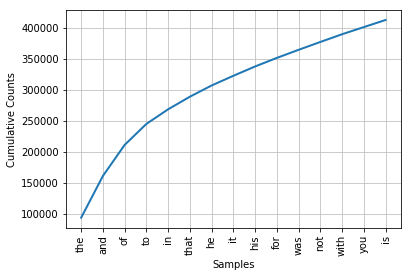

In [5]:
# Take a look at the frequency distribution

current_corpus = dnames[1]

from nltk.probability import FreqDist
x =  [" ".join(x) for x in data.train]
p = " ".join([j.lower() for j in x])
words = nltk.tokenize.word_tokenize(p)
fdist = FreqDist(words)
#print(len(x), len(p), len(words))
k = 15
print('Top-%d words in the %s corpus' %(k, current_corpus))
fdist.plot(15, cumulative=True)

Top-15 words in the reuters corpus, where character count > 10 
long words (1471617): time 1.78610 mins


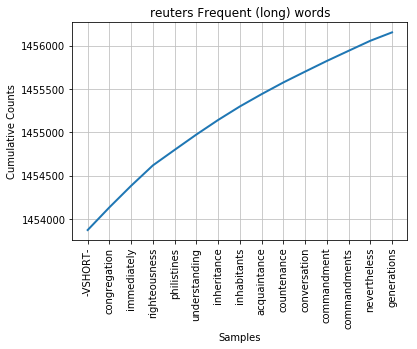

In [6]:
# Frequency distribution of long words
V = set(words)
min_freq = 10
long_words = [w for w in V if len(w) > 10]


start_time = timeit.default_timer() 
wordslong = []
for word in words:
    if word in long_words:
        wordslong.append(word)
    else:
        wordslong.append('-VSHORT-')
elapsed = timeit.default_timer() - start_time

print('Top-%d words in the %s corpus, where character count > %d ' %(k, current_corpus, min_freq))

print("long words (%d): time %.5f mins" % (len(wordslong), elapsed / float(60)))
 
title_words = current_corpus+ " Frequent (long) words"
fdist1 = FreqDist(wordslong)
fdist1.most_common(10)
fdist1.plot(15, cumulative=True, title=title_words)

# 3. Compute Perplexity


In [7]:
for dname in dnames:
    print('Corpus: %s' %(dname))
    print("\ttrain:", models[dname].perplexity(datas[dname].train))
    print("\tdev  :", models[dname].perplexity(datas[dname].dev))
    print("\ttest :", models[dname].perplexity(datas[dname].test))
    print('~'*50)

Corpus: brown
	train: 1513.8018008490042
	dev  : 1589.3868225664532
	test : 1604.198220472703
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Corpus: reuters
	train: 1471.209708062019
	dev  : 1479.0930760437175
	test : 1500.6949333808543
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Corpus: gutenberg
	train: 982.5718078017832
	dev  : 991.5002070957079
	test : 1005.7898465085633
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [3]:
for dname in dnames:
    print('Corpus: %s' %(dname))
    print("\ttrain:", models[dname].perplexity(datas[dname].train))
    print("\tdev  :", models[dname].perplexity(datas[dname].dev))
    print("\ttest :", models[dname].perplexity(datas[dname].test))
    print('~'*50)

Corpus: brown
	train: 0.43279109783140507
	dev  : 22203.611219423317
	test : 22923.19151297025
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Corpus: reuters
	train: 0.44022531316615643
	dev  : 900.04530167811
	test : 971.7556808534771
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Corpus: gutenberg
	train: 0.42619025621637086
	dev  : 2227.068848702625
	test : 2314.64077554299
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# 4. Plot perplexity as a function of training data size


Corpus: reuters


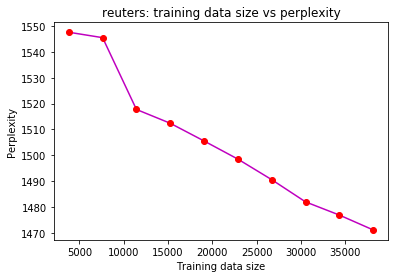

In [8]:

def corpussubsets(l, n):
    for i in range(0, len(l), n):
        yield l[:i + n]
        
        
colors = {}
colors['reuters'] ='m-' 
colors['brown'] = 'r-'
colors['gutenberg'] = 'b-'

current_corpus = 'reuters'
print('Corpus: %s' %(current_corpus))
batch_size = int(len(datas[current_corpus].train)/float(10))
chunks = corpussubsets(datas[current_corpus].train[:batch_size*10], batch_size)
perplexities = []
chunks_lens = []
for chunk in chunks:
    #print(' ', len(i))
    chunks_lens.append( len(chunk))
    perplexities.append(models[current_corpus].perplexity(chunk)) 

plt.xlabel('Training data size')
plt.ylabel('Perplexity')
title = current_corpus+': training data size vs perplexity'
plt.title(title)
plt.plot(chunks_lens, perplexities, colors[current_corpus])
plt.plot(chunks_lens, perplexities, 'ro')
plt.show()

# 5. Sample Sentences

## 5.1 Sample sentences with a specified prefix


In [9]:
from generator import Sampler
sampler = Sampler(models['reuters'])
print("sample 1: ", " ".join(str(x) for x in sampler.sample_sentence([])))
print("\nsample 2: ", " ".join(str(x) for x in sampler.sample_sentence([])))

sample 1:  is 94 veto dlrs year is of on

sample 2:  declined CSR NOTE compares it 000 QTR to said 800 said he UNCHANGED that and still in for vs the Banks sharply to Winchester 327 dry of of dlrs loss of largest soybean that future the 000 making new Shr tonnes opposition spokesman having lt 80 the mopnth 29 lending would of Balladur billion to as 83 of microchips riyals Pet its of


## 5.2 Sample sentences with a specified prefix

In [10]:
print("sample 1: ", " ".join(str(x) for x in sampler.sample_sentence(['shareholders could'])))
print("\nsample 2: ", " ".join(str(x) for x in sampler.sample_sentence(['administration'])))

sample 1:  shareholders could in finance its or asked mln cts

sample 2:  administration on USDA the member paying 39 the by in EC with to take by on Sara were there 73 vs TENDER 000 of least said to Sterling monthly its on was to 000 as alternative Shr Sugarman after mln fourth dlrs


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
import pandas as pd
import math

In [3]:
df = pd.read_csv('tuning_hyp.csv')

In [32]:
df

,dataset,perplexity,alpha,log_alpha
0,brown_train,7.998141,0.0001,-9.210340
1,brown_dev,14.143492,0.0001,-9.210340
2,brown_test,14.792639,0.0001,-9.210340
3,reuters_train,7.030132,0.0001,-9.210340
4,reuters_dev,10.810504,0.0001,-9.210340
5,reuters_test,11.134864,0.0001,-9.210340
6,gutenberg_train,10.551543,0.0001,-9.210340
7,gutenberg_dev,16.627832,0.0001,-9.210340
8,gutenberg_test,17.022804,0.0001,-9.210340
9,brown_train,30.939805,0.0010,-6.907755


In [22]:
df['log_alpha'] = df['alpha'].apply(lambda x: math.log(x))

In [24]:
df_brown_train = df.iloc[::9, :]
df_brown_train

,dataset,perplexity,alpha,log_alpha
0,brown_train,7.998141,0.0001,-9.210340
9,brown_train,30.939805,0.0010,-6.907755
18,brown_train,106.111425,0.0050,-5.298317
27,brown_train,189.091522,0.0100,-4.605170
36,brown_train,1467.987823,0.1000,-2.302585
45,brown_train,2797.972136,0.2000,-1.609438
54,brown_train,6664.735219,0.5000,-0.693147
63,brown_train,11730.362350,0.9000,-0.105361
72,brown_train,12990.151450,1.0000,0.000000


In [28]:
df_brown_dev = df.iloc[1::9, :]
df_brown_dev

,dataset,perplexity,alpha,log_alpha
1,brown_dev,14.143492,0.0001,-9.210340
10,brown_dev,58.378312,0.0010,-6.907755
19,brown_dev,199.200852,0.0050,-5.298317
28,brown_dev,353.554340,0.0100,-4.605170
37,brown_dev,2722.976882,0.1000,-2.302585
46,brown_dev,5187.259577,0.2000,-1.609438
55,brown_dev,12356.420830,0.5000,-0.693147
64,brown_dev,21753.690360,0.9000,-0.105361
73,brown_dev,24091.260300,1.0000,0.000000


In [30]:
df_brown_test = df.iloc[2::9, :]
df_brown_test

,dataset,perplexity,alpha,log_alpha
2,brown_test,14.792639,0.0001,-9.210340
11,brown_test,61.926183,0.0010,-6.907755
20,brown_test,212.661568,0.0050,-5.298317
29,brown_test,378.176355,0.0100,-4.605170
38,brown_test,2924.731385,0.1000,-2.302585
47,brown_test,5576.345177,0.2000,-1.609438
56,brown_test,13297.458820,0.5000,-0.693147
65,brown_test,23426.198120,0.9000,-0.105361
74,brown_test,25946.514980,1.0000,0.000000


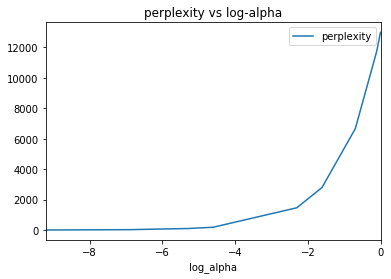

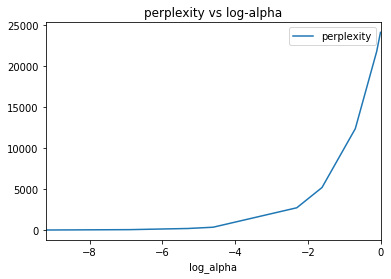

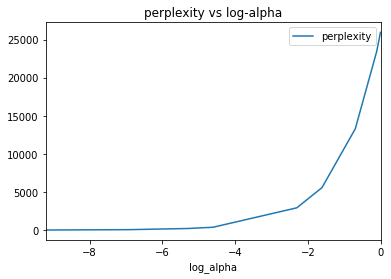

In [31]:
df_brown_train.plot.line(x='log_alpha', y = 'perplexity',title='perplexity vs log-alpha')
df_brown_dev.plot.line(x='log_alpha', y = 'perplexity',title='perplexity vs log-alpha')
df_brown_test.plot.line(x='log_alpha', y = 'perplexity',title='perplexity vs log-alpha')

In [ ]:
df = pd.DataFrame(np.random.randn(50, 4), 
        index=pd.date_range('1/1/2000', periods=50), columns=list('ABCD'))
df = df.cumsum()
df.plot();